In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

print(tf.__version__)

1.13.1


In [4]:
img_path = './../../npyPractice/data/result'
output_path = './../../npyPractice/data/result/output.mp4'

import glob
import os
img_list = glob.glob(os.path.join(img_path, "*"))

def cv2_imshow(img):
    ret = cv2.imencode('.png', img)[1].tobytes() 
    img_ip = IPython.display.Image(data=ret)
    IPython.display.display(img_ip)

In [5]:
len(img_list)

6

# GAN学習経過の可視化（動画作成）

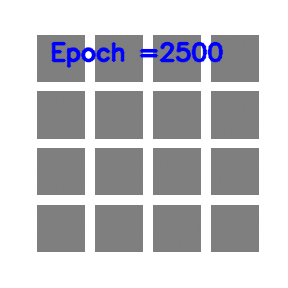

In [6]:
vw = None

line_type = cv2.LINE_AA   #ラインタイプを指定
font_face = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.8     
thickness = 2

color = (255,0 , 0)  # 白色


for index, png_file in enumerate(img_list):
  img = cv2.imread(png_file)
  # 文字列 "エポック数" を描画
  text = "Epoch =" + str(index * 500)
  cv2.putText(img, text=text, org=(50, 60), fontScale=font_scale, fontFace=font_face, thickness=thickness,color=color, lineType=line_type)

  save_video = True
  if save_video:
    if vw is None:
      codec = cv2.VideoWriter_fourcc(*'DIVX')
      vid_width_height = img.shape[1], img.shape[0]  # (288, 288)
      vw = cv2.VideoWriter(output_path, codec, 30, vid_width_height)  #(288, 288)で出力するファイルパスとコーデックを指定。
    # 変化具合をゆっくり表示させたいので複数回write
    vw.write(img)
    vw.write(img)
    vw.write(img)    
    vw.write(img)
    vw.write(img)
    vw.write(img)
    vw.write(img)
    vw.write(img)    
    vw.write(img)
    vw.write(img)
    # 描画用にスケールダウン
    #img_disp = cv2.resize(img, (0,0), fx=0.5, fy=0.5)
  cv2_imshow(img)
  IPython.display.clear_output(wait=True)  #出力結果の削除


if vw is not None:
    vw.release()   # mp4ファイルの開放(ここでmp４ファイルが完成する）